# 























































































Mean Maps


In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.colorbar import Colorbar
from pykrige.ok import OrdinaryKriging
import geopandas as gpd
import rasterio
from rasterio.transform import from_origin
from matplotlib.patches import FancyArrow
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
from shapely.geometry import box
from PIL import Image
import warnings
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import rasterio
import os
import math
from shapely.geometry import box
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from shapely.geometry import box
from matplotlib.patches import PathPatch
from matplotlib.path import Path
import numpy as np
from shapely.geometry import Polygon
from descartes import PolygonPatch
from matplotlib.ticker import MaxNLocator
import string


pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")

In [11]:
general_path = 'C:/Users/windows/OneDrive/Documentos/mestrado/DISSERTAÇÃO/scripts'
plt.rcParams.update({'font.family': 'Times New Roman'})
# Definindo os parâmetros
years = list(range(2014, 2025))
letra = list("abcdefghijklmnopqrstuvwxyz")
mapas =['EI_30', 'rain', 'E_D']
unity = ['Erosivity (MJ.mm/ha.h.year)', 'Rainfall (mm/year)', 'Erosivity density(MJ/ha.h)']
cmap_list = ['coolwarm_r', 'RdYlBu', 'viridis_r']
color_list=['#008B8B','#D35400','#4B4B4B']


# Ler o shapefile do Brasil
brasil_uf = gpd.read_file(r'C:\Users\Windows\OneDrive\Documentos\1-PhD\ARTIGO EROSIVITY\BR_UF_2024\BR_UF_2024.shp')
brasil_shapefile = brasil_uf.to_crs('EPSG:4674')

### MÉDIA DOS MAPAS

In [12]:
#Individual mmean Maps
with pd.HDFStore(f"{general_path}/Results erosivity/EI30_all_months.h5") as store:
    keys=store.keys()
plt.rcParams.update({'font.family': 'Times New Roman'})
years = range(2014, 2025)
mapa='EI_30'
for key in keys[1:]:
    raster_sum = None
    raster_square_sum = None
    count_valid = None
    for year in years:
        raster_path = os.path.join(general_path, 'Results erosivity','1 - Result_images', str(year), f"{mapa}_map_{year}{key.replace('/','_')}.tif")
        with rasterio.open(raster_path) as src:
            raster = src.read(1)  # Carrega a banda 1
            mask = ~np.isnan(raster)  # Máscara para valores válidos
            if raster_sum is None:
                raster_sum = np.zeros_like(raster, dtype=np.float64)
                raster_square_sum = np.zeros_like(raster, dtype=np.float64)
                count_valid = np.zeros_like(raster, dtype=np.float64)
            raster_sum[mask] += raster[mask]
            raster_square_sum[mask] += raster[mask] ** 2
            count_valid[mask] += 1
    raster_mean = raster_sum / count_valid
    raster_variance = (raster_square_sum / count_valid) - raster_mean**2
    raster_std_dev = np.sqrt(raster_variance)
    output_mean_path = os.path.join(general_path, 'Results erosivity','1 - Result_images','mapas mensais', f'{mapa}_mean_2014_2024{key.replace('/','_')}.tif')
    output_std_dev_path = os.path.join(general_path, 'Results erosivity','1 - Result_images','mapas mensais', f'{mapa}_std_dev_2014_2024{key.replace('/','_')}.tif')
    with rasterio.open(
        raster_path,  # Usa o último raster processado para metadados
        'r',
    ) as src:
        meta = src.meta

    meta.update(dtype=np.float64, nodata=np.nan)
    
    # Salva o raster da média
    with rasterio.open(output_mean_path, 'w', **meta) as dst:
        dst.write(raster_mean, 1)
    
    # Salva o raster do desvio padrão
    with rasterio.open(output_std_dev_path, 'w', **meta) as dst:
        dst.write(raster_std_dev, 1)
    
    print(f"Raster da média salvo {key} ")
    print(f"Raster do desvio padrão salvo {key}" )



Raster da média salvo /month_01 
Raster do desvio padrão salvo /month_01
Raster da média salvo /month_02 
Raster do desvio padrão salvo /month_02
Raster da média salvo /month_03 
Raster do desvio padrão salvo /month_03
Raster da média salvo /month_04 
Raster do desvio padrão salvo /month_04
Raster da média salvo /month_05 
Raster do desvio padrão salvo /month_05
Raster da média salvo /month_06 
Raster do desvio padrão salvo /month_06
Raster da média salvo /month_07 
Raster do desvio padrão salvo /month_07
Raster da média salvo /month_08 
Raster do desvio padrão salvo /month_08
Raster da média salvo /month_09 
Raster do desvio padrão salvo /month_09
Raster da média salvo /month_10 
Raster do desvio padrão salvo /month_10
Raster da média salvo /month_11 
Raster do desvio padrão salvo /month_11
Raster da média salvo /month_12 
Raster do desvio padrão salvo /month_12


In [13]:
import os
import rasterio
# Caminho geral que você já tem definido
mapa = 'EI_30'
years = range(2014, 2025)

with pd.HDFStore(f"{general_path}/Results erosivity/rain_all_months.h5") as store:
    keys = store.keys()

for key in keys[1:]:
    # Caminho para os arquivos de média e desvio padrão
    mean_path = os.path.join(general_path, 'Results erosivity', '1 - Result_images', 'mapas mensais', f'{mapa}_mean_2014_2024{key.replace("/", "_")}.tif')
    # Lendo e calculando min e max para o raster de média
    with rasterio.open(mean_path) as src_mean:
        raster_mean = src_mean.read(1)
        valid_mean = raster_mean[~np.isnan(raster_mean)]
        print(f"Para {key} - Média:")
        print(f"  Mínimo: {valid_mean.min()}")
        print(f"  Máximo: {valid_mean.max()}")


Para /month_01 - Média:
  Mínimo: 206.86601673473012
  Máximo: 2372.7696533203125
Para /month_02 - Média:
  Mínimo: 241.6481217471036
  Máximo: 2440.7913041548295
Para /month_03 - Média:
  Mínimo: 464.12259353290904
  Máximo: 3241.790283203125
Para /month_04 - Média:
  Mínimo: 206.38259289481422
  Máximo: 3038.728770862926
Para /month_05 - Média:
  Mínimo: 1.2922635105523197
  Máximo: 3197.163563121449
Para /month_06 - Média:
  Mínimo: 2.0476008436896582
  Máximo: 2726.8257390802555
Para /month_07 - Média:
  Mínimo: -5.0835443843494765
  Máximo: 2912.4132801402698
Para /month_08 - Média:
  Mínimo: -70.79792334816672
  Máximo: 1615.442808671431
Para /month_09 - Média:
  Mínimo: -26.236064650795676
  Máximo: 1472.1963029341264
Para /month_10 - Média:
  Mínimo: -6.88170844858343
  Máximo: 2247.7976906516337
Para /month_11 - Média:
  Mínimo: 32.42989617586136
  Máximo: 2079.738358931108
Para /month_12 - Média:
  Mínimo: 66.45127595554699
  Máximo: 2240.310702237216


In [33]:
#TABEL CLASSIFICATION PER CELL
output_raster_path = os.path.join(general_path, 'Results erosivity', '1 - Result_images', 'EI_30_mean_2014_2024.tif')
with rasterio.open(output_raster_path) as src:
    image = src.read(1)  # Read first band
    nodata = src.nodata  # NoData value to ignore invalid cells
valid_cells = image[image != nodata] if nodata is not None else image.flatten()

# Define erosivity classes
classes = [
    (None, 2452, "Low Erosivity"),
    (2452, 4905, "Moderate Erosivity"),
    (4905, 7357, "Moderate-High Erosivity"),
    (7357, 9810, "High Erosivity"),
    (9810, None, "Very High Erosivity")
]

# Compute statistics for each class
table = []
total_cells = len(valid_cells)
for lower, upper, label in classes:
    if lower is None:
        mask = valid_cells <= upper
    elif upper is None:
        mask = valid_cells > lower
    else:
        mask = (valid_cells > lower) & (valid_cells <= upper)

    count = mask.sum()
    percentage = (count / total_cells) * 100 if total_cells > 0 else 0

    table.append({
        "Erosivity Range (R)": f"{'' if lower is None else lower} < R ≤ {'' if upper is None else upper}",
        "Erosivity Level": label,
        "Observed Percentage (%)": f"{percentage:.1f}%",
        "Number of Cells": count
    })

# Export table to Excel
df_table = pd.DataFrame(table)
df_table.to_excel(os.path.join(general_path, 'Results erosivity', '1 - Result_images', 'erosivity_classification_area.xlsx'), index=False)


In [25]:
#VALIDATION DATASET

df_results_subs=pd.read_excel(general_path +'/Results erosivity/validation_dataset.xlsx') # FILLED
df_results_subs=df_results_subs[df_results_subs['sum']>=8] #anos de dados
columns = [str(year) for year in range(2014, 2025)]
filt_states=['SP', 'RJ', 'MG','PR','SC','ES',"RS",'PE','GO'] 
df_filtered = df_results_subs[df_results_subs['state'].isin(filt_states)]
# Applies samples
df_sampled = df_filtered.groupby('state').apply(lambda x: x.sample(frac=0.08, random_state=4)).reset_index(drop=True)
df_rest = df_results_subs[~df_results_subs['state'].isin(filt_states)]

df_final = pd.concat([df_sampled, df_rest], ignore_index=True)
df_final['mean'] = df_final[columns].apply(lambda row: row[row != 0].mean(), axis=1)
df_final = df_final.loc[:, ~df_final.columns.str.contains('^Unnamed')]
df_final.to_excel(os.path.join(general_path,'Results erosivity','validation_dataset.xlsx'))


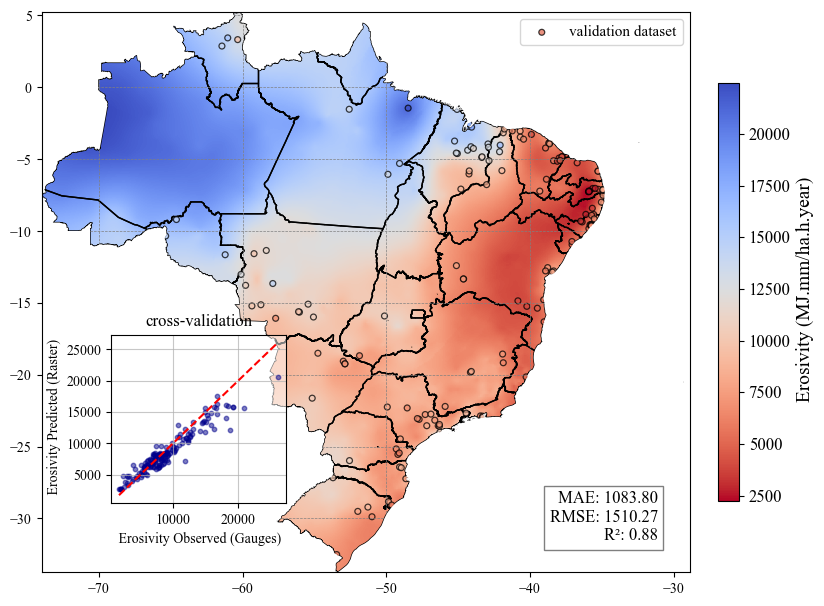

In [35]:
#MEAN MAP
plt.rcParams.update({'font.family': 'Times New Roman'})
mapa='EI_30'
k=0


columns = [str(year) for year in range(2014, 2025)]

#média dos valores sem contar o zero


cmap = cmap_list[k]
#OPEN IMAGE
output_raster_path=os.path.join(general_path,'Results erosivity','1 - Result_images',  f'{mapa}_mean_2014_2024.tif')
with rasterio.open(output_raster_path) as src:
    image = src.read(1)
bounds = brasil_shapefile.total_bounds  # [minx, miny, maxx, maxy]
minx, miny, maxx, maxy = bounds
extent = [minx, maxx, miny, maxy]  


point_values = []
for _, row in df_final.iterrows():
    lon, lat = row['long'], row['lat']
    y = math.ceil((lat + 33.75) * 372 / 39)
    x = math.ceil((lon + 74) * 372 / 45.2)
    point_values.append(image[y, x])

mae = mean_absolute_error(df_final['mean'], point_values)
rmse = mean_squared_error(df_final['mean'], point_values, squared=False)
r2 = r2_score(df_final['mean'], point_values)
values=df_final['mean']


# Criando o mapa principal
fig, ax = plt.subplots(figsize=(9, 9))
ax.imshow(image, extent=extent, origin='lower', cmap=cmap)
#mask
extra_x = 2  
extra_y = 2
outer_rect = box(minx, miny - extra_y, maxx + extra_x, maxy)
gdf_rect = gpd.GeoDataFrame(geometry=[outer_rect], crs=brasil_shapefile.crs)
mask_gdf = gpd.overlay(gdf_rect, brasil_shapefile, how='difference')
mask_gdf.plot(ax=ax, facecolor='white', edgecolor='none', zorder=2)


brasil_shapefile.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)
ax.grid(color='gray', linestyle='--', linewidth=0.5)
norm = plt.Normalize(vmin=values.min(), vmax=values.max())  # Normaliza 
scatter = ax.scatter(df_final['long'],df_final['lat'],c=values,cmap=cmap,s=18,edgecolor='black',linewidth=0.9,label='validation dataset',alpha=0.75)

img_plot = ax.imshow(image, extent=extent, origin='lower', cmap=cmap)
cbar = plt.colorbar(img_plot, ax=ax, orientation='vertical', fraction=0.03, pad=0.04)
cbar.ax.tick_params(labelsize=12)
cbar.set_label(f" {unity[k]}", fontsize=14)
ax.legend(fontsize=11)

# Adicionando a caixa de texto no canto inferior direito
stats_text = f"MAE: {mae:.2f}\nRMSE: {rmse:.2f}\nR²: {r2:.2f}"
ax.text(0.95, 0.05, stats_text, transform=ax.transAxes, fontsize=12, verticalalignment='bottom', horizontalalignment='right',
        bbox=dict(facecolor='white', alpha=0.5))

# Adicionando o gráfico de validação cruzada no canto inferior esquerdo
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

inset_ax = inset_axes(ax, width="27%", height="30%", loc='lower left', borderpad=5)
inset_ax.scatter(df_final['mean'], point_values, s=10 ,color='darkblue', alpha=0.5)
inset_ax.plot([min(df_final['mean']), max(df_final['mean'])],
              [min(df_final['mean']), max(df_final['mean'])], color='red', linestyle='--')
inset_ax.set_title("cross-validation", fontsize=12)
inset_ax.set_xlabel(f" {unity[k].split(' ')[0]} Observed (Gauges)", fontsize=10)
inset_ax.set_ylabel(f" {unity[k].split(' ')[0]} Predicted (Raster)", fontsize=10)
inset_ax.tick_params(axis='both', which='major', labelsize=10)
inset_ax.grid(True, alpha=0.7)
inset_ax.patch.set_alpha(0.5)  # Fundo transparente do gráfico



# Salvando e exibindo
plt.savefig(os.path.join(general_path,'Results erosivity','1 - Result_images', f'map_EVALUATION_{mapa}.png'), dpi=300, bbox_inches='tight')
plt.show()


In [179]:
maxx-4

-32.847639914

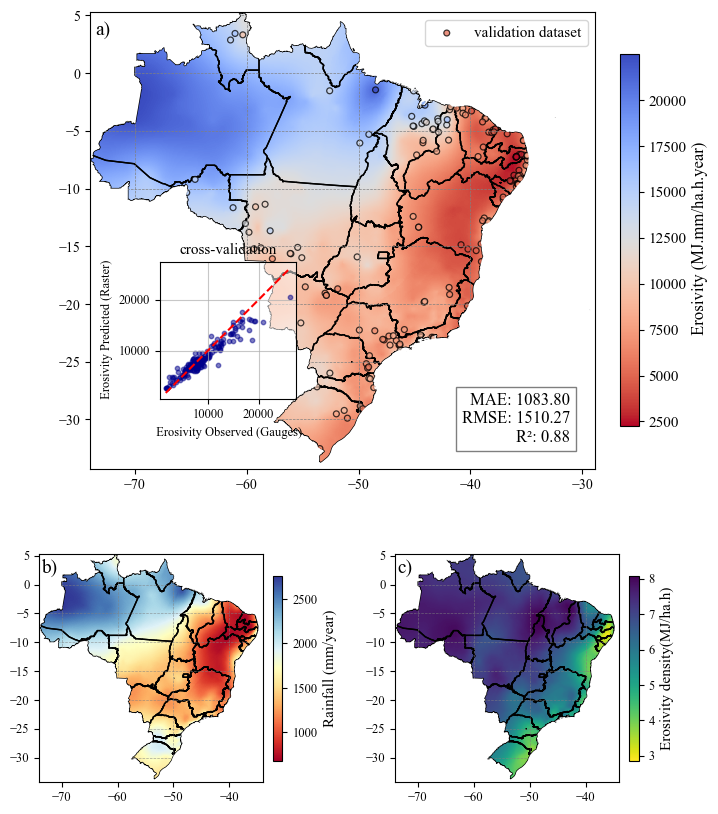

In [197]:
## SUBPLOTS ALL TREE MAPS

plt.rcParams.update({'font.family': 'Times New Roman'})

mapa = 'EI_30'
k = 0
columns = [str(year) for year in range(2014, 2025)]
df_final['mean'] = df_final[columns].apply(lambda row: row[row != 0].mean(), axis=1)
cmap = cmap_list[k]

output_raster_path = os.path.join(general_path, 'Results erosivity', '1 - Result_images', f'{mapa}_mean_2014_2024.tif')
with rasterio.open(output_raster_path) as src:
    image = src.read(1)

bounds = brasil_shapefile.total_bounds
minx, miny, maxx, maxy = bounds
extent = [minx, maxx, miny, maxy]

point_values = []
for _, row in df_final.iterrows():
    lon, lat = row['long'], row['lat']
    y = math.ceil((lat + 33.75) * 372 / 39)
    x = math.ceil((lon + 74) * 372 / 45.2)
    point_values.append(image[y, x])

mae = mean_absolute_error(df_final['mean'], point_values)
rmse = mean_squared_error(df_final['mean'], point_values, squared=False)
r2 = r2_score(df_final['mean'], point_values)
values = df_final['mean']

extra_x = 2
extra_y = 2
outer_rect = box(minx, miny - extra_y - 0.5, maxx + extra_x, maxy)
gdf_rect = gpd.GeoDataFrame(geometry=[outer_rect], crs=brasil_shapefile.crs)
mask_gdf = gpd.overlay(gdf_rect, brasil_shapefile, how='difference')

fig = plt.figure(figsize=(8, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[2, 1], hspace=0.25)
gs.update(wspace=0.35)  # <- Aumenta o espaço entre os subplots inferiores
ax_main = fig.add_subplot(gs[0, :])
img_main = ax_main.imshow(image, extent=extent, origin='lower', cmap=cmap)
mask_gdf.plot(ax=ax_main, facecolor='white', edgecolor='none', zorder=2)
brasil_shapefile.plot(ax=ax_main, facecolor="none", edgecolor="black", linewidth=1)
ax_main.grid(color='gray', linestyle='--', linewidth=0.5)
scatter = ax_main.scatter(df_final['long'], df_final['lat'], c=values, cmap=cmap, s=18,
                          edgecolor='black', linewidth=0.9, label='validation dataset', alpha=0.75)
cbar_main = plt.colorbar(img_main, ax=ax_main, orientation='vertical', fraction=0.03, pad=0.04)
cbar_main.ax.tick_params(labelsize=11)
cbar_main.set_label(f" {unity[k]}", fontsize=12)
ax_main.legend(fontsize=11)
ax_main.text(0.01, 0.98, "a)", transform=ax_main.transAxes, fontsize=14,
             verticalalignment='top', horizontalalignment='left')  # <-- Corrigido parêntese aqui
stats_text = f"MAE: {mae:.2f}\nRMSE: {rmse:.2f}\nR²: {r2:.2f}"
ax_main.text(0.95, 0.05, stats_text, transform=ax_main.transAxes, fontsize=12,
             verticalalignment='bottom', horizontalalignment='right',
             bbox=dict(facecolor='white', alpha=0.5))
ax_main.set_ylim(miny - 0.5, maxy) 
ax_main.set_xlim(minx , maxx) 
inset_ax = inset_axes(ax_main, width="27%", height="30%", loc='lower left', borderpad=5)
inset_ax.scatter(df_final['mean'], point_values, s=10, color='darkblue', alpha=0.5)
inset_ax.plot([min(df_final['mean']), max(df_final['mean'])],
              [min(df_final['mean']), max(df_final['mean'])], color='red', linestyle='--')
inset_ax.set_title("cross-validation", fontsize=11)
inset_ax.set_xlabel(f" {unity[k].split(' ')[0]} Observed (Gauges)", fontsize=9)
inset_ax.set_ylabel(f" {unity[k].split(' ')[0]} Predicted (Raster)", fontsize=9)
inset_ax.tick_params(axis='both', which='major', labelsize=9)
inset_ax.grid(True, alpha=0.7)
inset_ax.patch.set_alpha(0.5)

for i, (key, ax) in enumerate(zip(['rain', 'E_D'], [fig.add_subplot(gs[1, 0]), fig.add_subplot(gs[1, 1])])):
    raster_path = os.path.join(general_path, 'Results erosivity', f'2 - Result_images_{key}', 'mapas mensais', f'{key}_mean_2014_2024_annual.tif')
    with rasterio.open(raster_path) as src:
        img = src.read(1)
    img_plot = ax.imshow(img, extent=extent, origin='lower', cmap=cmap_list[i+1])
    ax.set_ylim(miny - 0.5, maxy)
    ax.set_xlim(minx , maxx-5.2) 
    mask_gdf.plot(ax=ax, facecolor='white', edgecolor='none', zorder=2)
    brasil_shapefile.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)
    ax.text(0.01, 0.98, f"{chr(ord('b') + i)})", transform=ax.transAxes, fontsize=14,
            verticalalignment='top', horizontalalignment='left')  
    ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    ax.tick_params(labelsize=9)
    cbar = plt.colorbar(img_plot, ax=ax, orientation='vertical', fraction=0.035, pad=0.04)
    cbar.ax.tick_params(labelsize=9)
    cbar.set_label(f"{unity[i+1]}", fontsize=11)


plt.savefig(os.path.join(general_path, 'Results erosivity', '1 - Result_images', f'map_EVALUATION_3panels2.png'),dpi=300, bbox_inches='tight', pil_kwargs={"compression": "tiff_lzw"})
plt.show()



In [45]:
import string

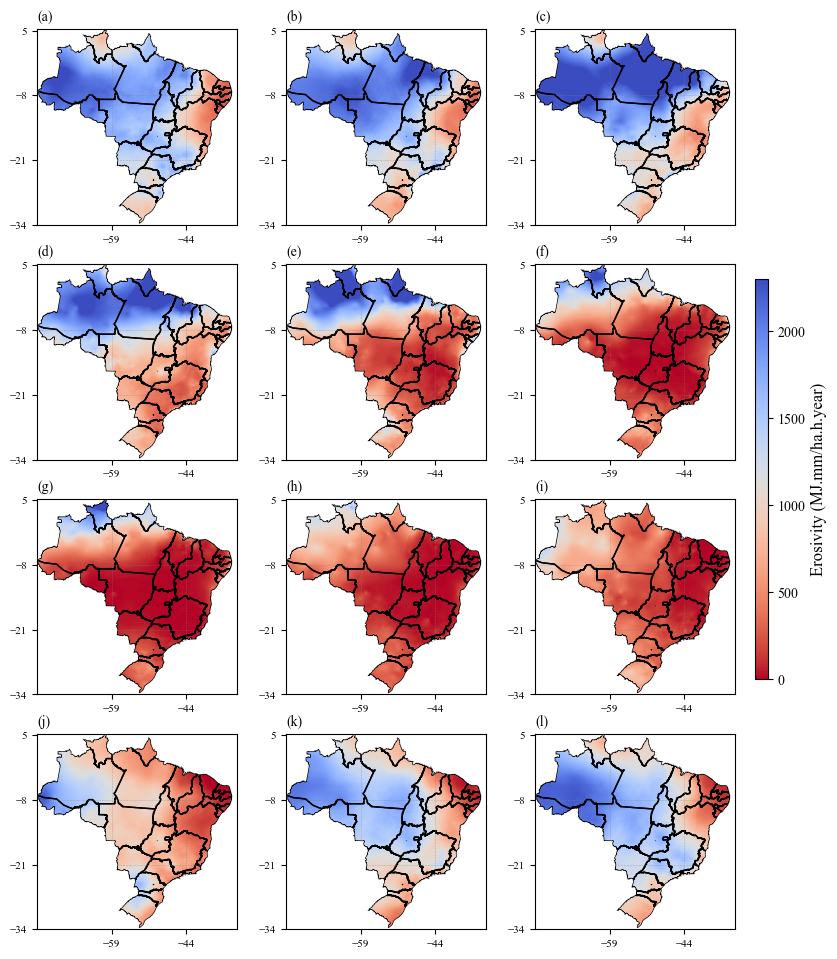

In [113]:


plt.rcParams.update({'font.family': 'Times New Roman'})

mapa = 'EI_30'
k=0
cmap = cmap_list[k]
month_labels = [f"_month_{str(m).zfill(2)}" for m in range(1, 13)]
letters = list(string.ascii_lowercase[:12])

bounds = brasil_shapefile.total_bounds
minx, miny, maxx, maxy = bounds
extent = [minx, maxx, miny, maxy]

extra_x = 2
extra_y = 2
outer_rect = box(minx, miny - extra_y, maxx + extra_x, maxy)
gdf_rect = gpd.GeoDataFrame(geometry=[outer_rect], crs=brasil_shapefile.crs)
mask_gdf = gpd.overlay(gdf_rect, brasil_shapefile, how='difference')

fig, axes = plt.subplots(4, 3, figsize=(8.3, 10))
axes = axes.flatten()
all_images = []

vmin, vmax = 0, 2300  # ajustar conforme necessário

for i, key in enumerate(month_labels):
    input_raster_path = os.path.join(
        general_path, 'Results erosivity', '1 - Result_images', 'mapas mensais',
        f'{mapa}_mean_2014_2024{key}.tif'
    )
    with rasterio.open(input_raster_path) as src:
        image = src.read(1)
        all_images.append(image)

    ax = axes[i]
    img_plot = ax.imshow(image, extent=extent, origin='lower', cmap=cmap, vmin=vmin, vmax=vmax)
    mask_gdf.plot(ax=ax, facecolor='white', edgecolor='none', zorder=2)
    brasil_shapefile.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)

    ax.set_xlim(minx, maxx)
    ax.set_ylim(miny, maxy)
    ax.set_aspect('equal')

    ax.grid(color='gray', linestyle='--', linewidth=0.4, alpha=0.5)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    ax.set_xticks(np.linspace(minx, maxx, 4, dtype=int))
    ax.set_yticks(np.linspace(miny, maxy, 4, dtype=int))

    
    ax.tick_params(labelsize=8)
    ax.set_xlim(minx , maxx-5) 
    ax.set_title(f"({letters[i]})", fontsize=10, loc='left')

cbar_ax = fig.add_axes([0.92, 0.3, 0.015, 0.4])
img = axes[0].imshow(all_images[0], extent=extent, origin='lower', cmap=cmap, vmin=vmin, vmax=vmax)
cbar = fig.colorbar(img, cax=cbar_ax, orientation='vertical')
cbar.set_label(f"{unity[k]}", fontsize=12)
cbar.ax.tick_params(labelsize=10)

plt.subplots_adjust(left=0.05, right=0.9, bottom=0.05, top=0.95, hspace=0.2, wspace=0.2)
plt.savefig(os.path.join(general_path, 'Results erosivity', f'map_MONTHLY_EVALUATION3_{mapa}.png'), dpi=300,bbox_inches='tight',pil_kwargs={"compression": "tiff_lzw"})
plt.show()


In [ ]:
mapa = 'EI_30'
cmap = cmap_list[0]
month_labels = [f"month_{str(m).zfill(2)}" for m in range(1, 13)]
letters = list(string.ascii_lowercase[:12])  # ['a', 'b', ..., 'l']

fig, axes = plt.subplots(4, 3, figsize=(8, 11))  # A4 size
axes = axes.flatten()

bounds = brasil_shapefile.total_bounds
minx, miny, maxx, maxy = bounds
extent = [minx, maxx, miny, maxy]
extra_x = 2
extra_y = 2

outer_rect = box(minx, miny - extra_y, maxx + extra_x, maxy)
gdf_rect = gpd.GeoDataFrame(geometry=[outer_rect], crs=brasil_shapefile.crs)
mask_gdf = gpd.overlay(gdf_rect, brasil_shapefile, how='difference')

# Carregar todas as imagens
all_images = []
for month_key in month_labels:
    input_raster_path = os.path.join(
        general_path, 'Results erosivity', '1 - Result_images', 'mapas mensais',
        f'{mapa}_mean_2014_2024_{month_key}.tif'
    )
    with rasterio.open(input_raster_path) as src:
        image = src.read(1)
        all_images.append(image)

vmin, vmax = 0, 1000  # Escala fixa

# Plotar os mapas mensais
for i, (month_key, image) in enumerate(zip(month_labels, all_images)):
    ax = axes[i]
    ax.imshow(image, extent=extent, origin='lower', cmap=cmap, vmin=vmin, vmax=vmax)
    mask_gdf.plot(ax=ax, facecolor='white', edgecolor='none', zorder=2)
    brasil_shapefile.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)
    ax.set_title(f"({letters[i]})", fontsize=10, loc='left')
    ax.set_xticks([])
    ax.set_yticks([])

# Colorbar compartilhada
cbar_ax = fig.add_axes([0.92, 0.15, 0.015, 0.7])
img = axes[0].imshow(all_images[0], extent=extent, origin='lower', cmap=cmap, vmin=vmin, vmax=vmax)
cbar = fig.colorbar(img, cax=cbar_ax, orientation='vertical')
cbar.set_label(f"{unity[0]}", fontsize=12)
cbar.ax.tick_params(labelsize=10)

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.savefig(os.path.join(general_path, 'Results erosivity', '1 - Result_images', f'map_MONTHLY_EVALUATION_{mapa}.png'), dpi=300)
plt.show()

In [ ]:
#mask
extra_x = 2  
extra_y = 2
outer_rect = box(minx, miny - extra_y, maxx + extra_x, maxy)
gdf_rect = gpd.GeoDataFrame(geometry=[outer_rect], crs=brasil_shapefile.crs)
mask_gdf = gpd.overlay(gdf_rect, brasil_shapefile, how='difference')
mask_gdf.plot(ax=ax, facecolor='white', edgecolor='none', zorder=2)


In [ ]:
#all RASTERS ALL MONTHS
plt.rcParams.update({'font.family': 'Times New Roman'})
for k, mapa in enumerate(mapas):


    
    bounds = brasil_shapefile.total_bounds
    minx, miny, maxx, maxy = bounds
    extent = [minx, maxx, miny, maxy]
    gridx = np.linspace(minx, maxx, 150)
    gridy = np.linspace(miny, maxy, 150)
    z_min, z_max = float('inf'), float('-inf')
    cmap = cmap_list[k]
    nrows, ncols = 3, 4
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 12), constrained_layout=True)
    # Processamento dos anos
    for i, year in enumerate(years):

        df_data = pd.read_hdf(f"{general_path}/Results_Erosivity_zero.h5", key='EI_30')
        df_data = df_data[['state', 'gauge_code', 'long', 'lat', str(year)]].replace(0, np.nan).dropna().reset_index(drop=True)
        df_data = df_data.rename(columns={str(year): 'EI_30'})
        df_data['E_D'] = pd.read_hdf(f"{general_path}/Results_Erosivity_zero.h5", key='E_D')[[str(year)]].replace(0, np.nan).dropna().reset_index(drop=True)[str(year)]
        df_data['rain'] = df_data['EI_30'] / df_data['E_D']
    
        df_outliers = pd.read_hdf(os.path.join(general_path, '2 - Result_images', 'outliers_removidos.h5'), key=str(year))
        lista_outliers = df_outliers['gauge_code'].to_list()
        df_data = df_data[~df_data['gauge_code'].isin(lista_outliers)]
    
        latitude = df_data['lat'].values
        longitude = df_data['long'].values
        aqi_value = df_data[mapa].values

        output_dir = os.path.join(general_path, '2 - Result_images', 'Results-dissertação',str(year))
        if mapa == 'rain':output_dir = os.path.join(general_path, '2 - Result_images',str(year))
        raster_path = os.path.join(output_dir, f"{mapa}_map_{year}.tif")
        with rasterio.open(raster_path) as f:
            z_interp = f.read(1)


        if mapa == 'EI_30':
            z_interp = np.where(z_interp > 31000, 31000, z_interp)  # Define o limite máximo
        if mapa == 'rain':
            z_interp = np.where(z_interp > 3500, 3500, z_interp)  # Define o limite máximo

        z_min = min(z_min, z_interp.min())
        z_max = max(z_max, z_interp.max())

        ax = axes[i // ncols, i % ncols]
        im = ax.imshow(z_interp, extent=extent, origin='lower', cmap=cmap, alpha=1, vmin=None, vmax=None)
        brasil_shapefile.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)
        ax.scatter(longitude, latitude, color="k", zorder=3, marker='o', s=4)
        ax.set_title(f"{letra[i]})  {year}", fontsize=20)
        ax.set_xlim([minx, maxx])
        ax.set_ylim([miny, maxy])
        ax.grid(color='gray', linestyle='--', linewidth=0.5)
        ax.set_aspect('equal', 'box')
        for spine in ax.spines.values():
            spine.set_edgecolor('black')
            spine.set_linewidth(1)
        ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)  # Remove os números das bordas
    for ax in axes.flat:
        im.set_clim(z_min, z_max)
    axes[-1, -1].axis("off")
    pos = axes[-1, -1].get_position()  # Posição do último subplot
    cbar_ax = fig.add_axes([pos.x0+0.1, pos.y0, 0.03 , pos.height-0.03])  # Usa a mesma posição e tamanho
    norm = cm.colors.Normalize(vmin=z_min, vmax=z_max)
    cbar = Colorbar(ax=cbar_ax, mappable=cm.ScalarMappable(norm=norm, cmap=cmap), orientation='vertical')
    cbar.ax.tick_params(labelsize=16)
    cbar.set_label(unity[k], fontsize=18)
    plt.savefig(general_path + r'\2 - Result_images\Krigagem_ordinária_'+mapa+'_All_years', dpi=300, bbox_inches='tight')
    plt.close()

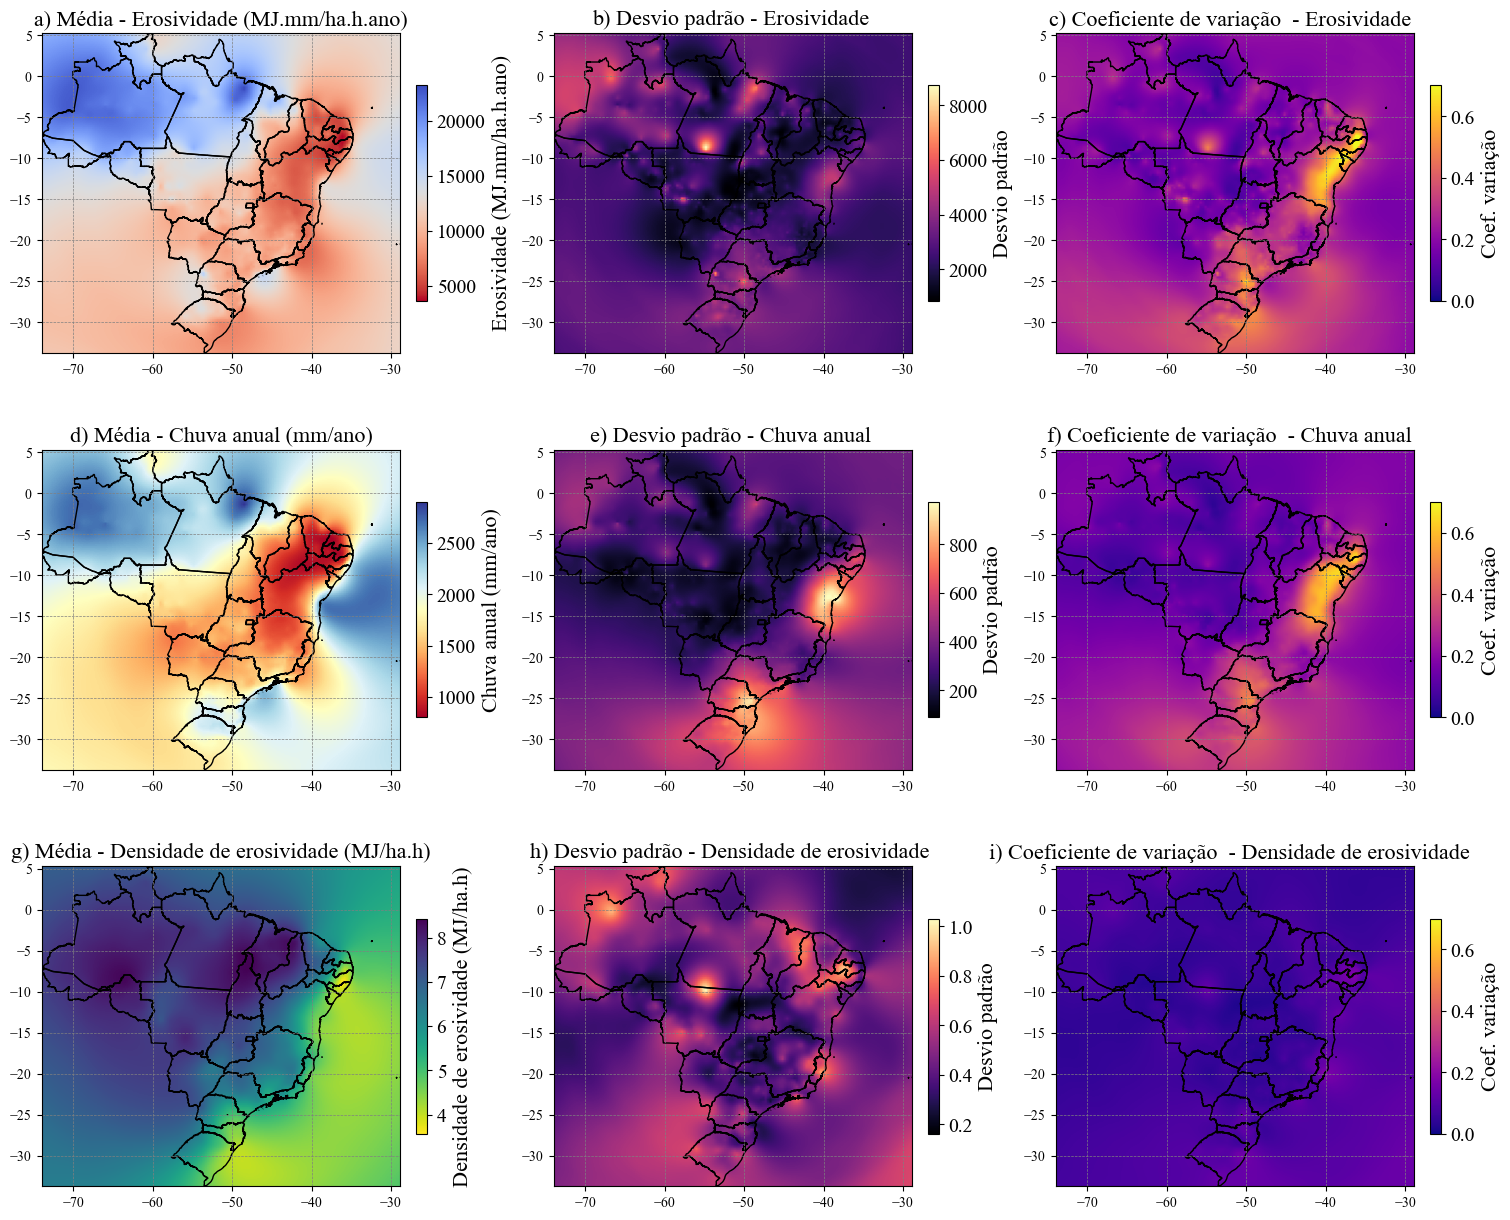

In [8]:


# Definindo a fonte global para Times New Roman
plt.rcParams.update({'font.family': 'Times New Roman'})

# Lista de mapas e unidades
mapas = ['EI_30', 'rain', 'E_D']
unity = ['Erosividade (MJ.mm/ha.h.ano)', 'Chuva anual (mm/ano)', 'Densidade de erosividade (MJ/ha.h)']

# Criar uma figura com 3 linhas e 3 colunas
fig, axes = plt.subplots(3, 3, figsize=(15, 12.5), constrained_layout=True)



for i, mapa in enumerate(mapas):
    output_std_dev_path = os.path.join(general_path, '2 - Result_images', f'{mapa}_std_dev_2014_2024.tif')
    output_mean_path = os.path.join(general_path, '2 - Result_images', f'{mapa}_mean_2014_2024.tif')
    
    with rasterio.open(output_mean_path) as src_mean, rasterio.open(output_std_dev_path) as src_std:
        image_mean = src_mean.read(1)
        image_std = src_std.read(1)
        image_c_v = image_std / image_mean
    
    bounds = brasil_shapefile.total_bounds
    minx, miny, maxx, maxy = bounds
    extent = [minx, maxx, miny, maxy]

    # Mapas para cada linha
    ax_mean, ax_std, ax_cv = axes.flatten()[i*3:i*3+3]  # Ajustando para pegar a ordem correta de subplots
    
    # Mapa de média

    img_plot_mean = ax_mean.imshow(image_mean, extent=extent, origin='lower', cmap=cmap_list[i])
    brasil_shapefile.plot(ax=ax_mean, facecolor="none", edgecolor="black", linewidth=1)
    ax_mean.set_title(f'{letra[i*3]}) Média - {unity[i]}', fontsize=16)  # Título com letra e aumento de fonte
    ax_mean.grid(color='gray', linestyle='--', linewidth=0.5)
    cbar_mean = plt.colorbar(img_plot_mean, ax=ax_mean, orientation='vertical', fraction=0.03, pad=0.04)
    cbar_mean.ax.tick_params(labelsize=14)
    cbar_mean.set_label(f'{unity[i]}', fontsize=16)

    # Mapa de desvio padrão
    img_plot_std = ax_std.imshow(image_std, extent=extent, origin='lower', cmap='magma')
    brasil_shapefile.plot(ax=ax_std, facecolor="none", edgecolor="black", linewidth=1)
    ax_std.set_title(f'{letra[i*3+1]}) Desvio padrão - {unity[i].split('(')[0]}', fontsize=16)  # Título com letra e aumento de fonte
    ax_std.grid(color='gray', linestyle='--', linewidth=0.5)
    cbar_std = plt.colorbar(img_plot_std, ax=ax_std, orientation='vertical', fraction=0.03, pad=0.04)
    cbar_std.ax.tick_params(labelsize=14)
    cbar_std.set_label('Desvio padrão', fontsize=16)
    
    # Mapa do coeficiente de variação
    img_plot_cv = ax_cv.imshow(image_c_v, extent=extent, origin='lower', cmap='plasma', vmin=0, vmax=0.7)
    brasil_shapefile.plot(ax=ax_cv, facecolor="none", edgecolor="black", linewidth=1)
    ax_cv.set_title(f'{letra[i*3+2]}) Coeficiente de variação  - {unity[i].split('(')[0]} ', fontsize=16)  # Título com letra e aumento de fonte
    ax_cv.grid(color='gray', linestyle='--', linewidth=0.5)
    cbar_cv = plt.colorbar(img_plot_cv, ax=ax_cv, orientation='vertical', fraction=0.03, pad=0.04)
    cbar_cv.ax.tick_params(labelsize=14)
    cbar_cv.set_label('Coef. variação', fontsize=16)

# Salvar e exibir o gráfico
plt.savefig(os.path.join(general_path, '2 - Result_images', 'map_Media_Desvio.png'), dpi=300, bbox_inches='tight')
plt.show()





<Figure size 1000x800 with 0 Axes>

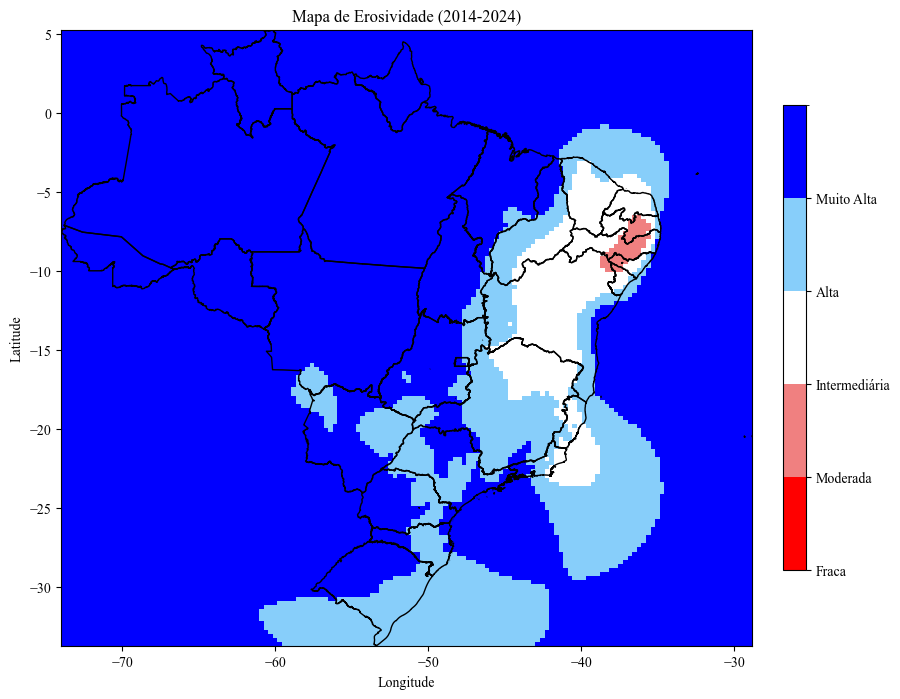

In [61]:
bounds = brasil_shapefile.total_bounds
minx, miny, maxx, maxy = bounds
extent = [minx, maxx, miny, maxy]
mapa = 'EI_30'
output_mean_path = os.path.join(general_path, '2 - Result_images', f'{mapa}_mean_2014_2024.tif')

# Carrega a imagem (array) a partir do arquivo raster
with rasterio.open(output_mean_path) as src_mean:
    image_mean = src_mean.read(1)

image_mean = np.nan_to_num(image_mean, nan=0, posinf=0, neginf=0)

bins = [0.1, 2452, 4905, 7357, 9810, 60000]

norm = mcolors.BoundaryNorm(bins, ncolors=5)

cmap = mcolors.ListedColormap(['red', 'lightcoral', 'white', 'lightskyblue', 'blue'])

plt.figure(figsize=(10, 8))
plt.figure(figsize=(10, 8))

img=plt.imshow(image_mean, cmap=cmap, norm=norm,extent=extent,  origin='lower',alpha=1)
brasil_shapefile.plot(ax=plt.gca(), facecolor="none", edgecolor="black", linewidth=1)
cbar = plt.colorbar(img, ticks=bins[:-1],fraction=0.03, pad=0.04)
cbar.ax.set_yticklabels(['Fraca', 'Moderada', 'Intermediária', 'Alta', 'Muito Alta'])
plt.title("Mapa de Erosividade (2014-2024)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig(os.path.join(general_path, '2 - Result_images', 'map_classificação.png'), dpi=300, bbox_inches='tight')
plt.show()



In [81]:
df

,Erosividade (R),Nível de Erosividade,Percentual Observado (%)
0,R ≤ 2452,Erosividade Fraca,0.0
1,2452 < R ≤ 4905,Erosividade Média,0.4
2,4905 < R ≤ 7357,Erosividade Média-Forte,4.9
3,7357 < R ≤ 9810,Erosividade Forte,14.8
4,9810 < R,Erosividade Muito Forte,79.9


   Erosividade (R)     Nível de Erosividade  Percentual Observado (%)
0         R ≤ 2452        Erosividade Fraca                       0.0
1  2452 < R ≤ 4905        Erosividade Média                       0.4
2  4905 < R ≤ 7357  Erosividade Média-Forte                       4.9
3  7357 < R ≤ 9810        Erosividade Forte                      14.8
4         9810 < R  Erosividade Muito Forte                      79.9


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Windows\\OneDrive\\Documentos\\mestrado\\DISSERTAÇÃO\\scripts\\general_path\\2 - Result_images\\map_classificação 2.png'

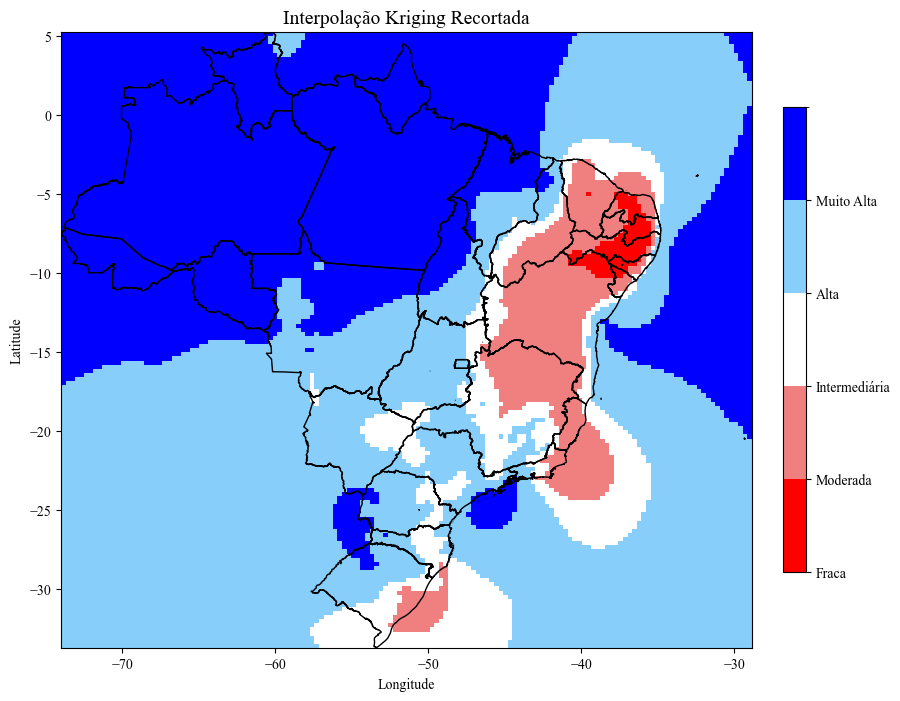

In [69]:
import numpy as np
import pandas as pd
import rasterio
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import geopandas as gpd
import os

# Abrir o raster recortado
with rasterio.open(output_mean_path) as src:
    image_cropped = src.read(1)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

# Definir os intervalos de erosividade e rótulos
bins = [0, 2452, 4905, 7357, 9810, np.inf]
labels = [
    "Erosividade Fraca",
    "Erosividade Média",
    "Erosividade Média-Forte",
    "Erosividade Forte",
    "Erosividade Muito Forte"
]

# Contar os pixels em cada intervalo
hist, _ = np.histogram(image_cropped, bins=bins)
total_pixels = np.sum(hist)
percentages = (hist / total_pixels) * 100

# Criar DataFrame com os resultados
df = pd.DataFrame({
    "Erosividade (R)": ["R ≤ 2452", "2452 < R ≤ 4905", "4905 < R ≤ 7357", "7357 < R ≤ 9810", "9810 < R"],
    "Nível de Erosividade": labels,
    "Percentual Observado (%)": np.round(percentages, 1)
})

print(df)

# Definir o normalizador e o cmap
bins = [0.1, 5452, 7905, 9357, 12810, 60000]
norm = mcolors.BoundaryNorm(bins, ncolors=5)
cmap = mcolors.ListedColormap(['red', 'lightcoral', 'white', 'lightskyblue', 'blue'])


# Plotar a imagem
fig, ax = plt.subplots(figsize=(10, 8))
img = ax.imshow(image_cropped, cmap=cmap, norm=norm, extent=extent, origin='lower', alpha=1)

# Plotar o shapefile do Brasil
brasil_shapefile.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)

# Adicionar a barra de cores
cbar = plt.colorbar(img, ticks=bins[:-1], fraction=0.03, pad=0.04)
cbar.ax.set_yticklabels(['Fraca', 'Moderada', 'Intermediária', 'Alta', 'Muito Alta'])

# Configurações do gráfico
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_title("Interpolação Kriging Recortada", fontsize=14)

# Salvar o gráfico
output_path = os.path.join("general_path", "2 - Result_images", "map_classificação 2.png")
plt.savefig(output_path, dpi=300, bbox_inches='tight')

plt.show()


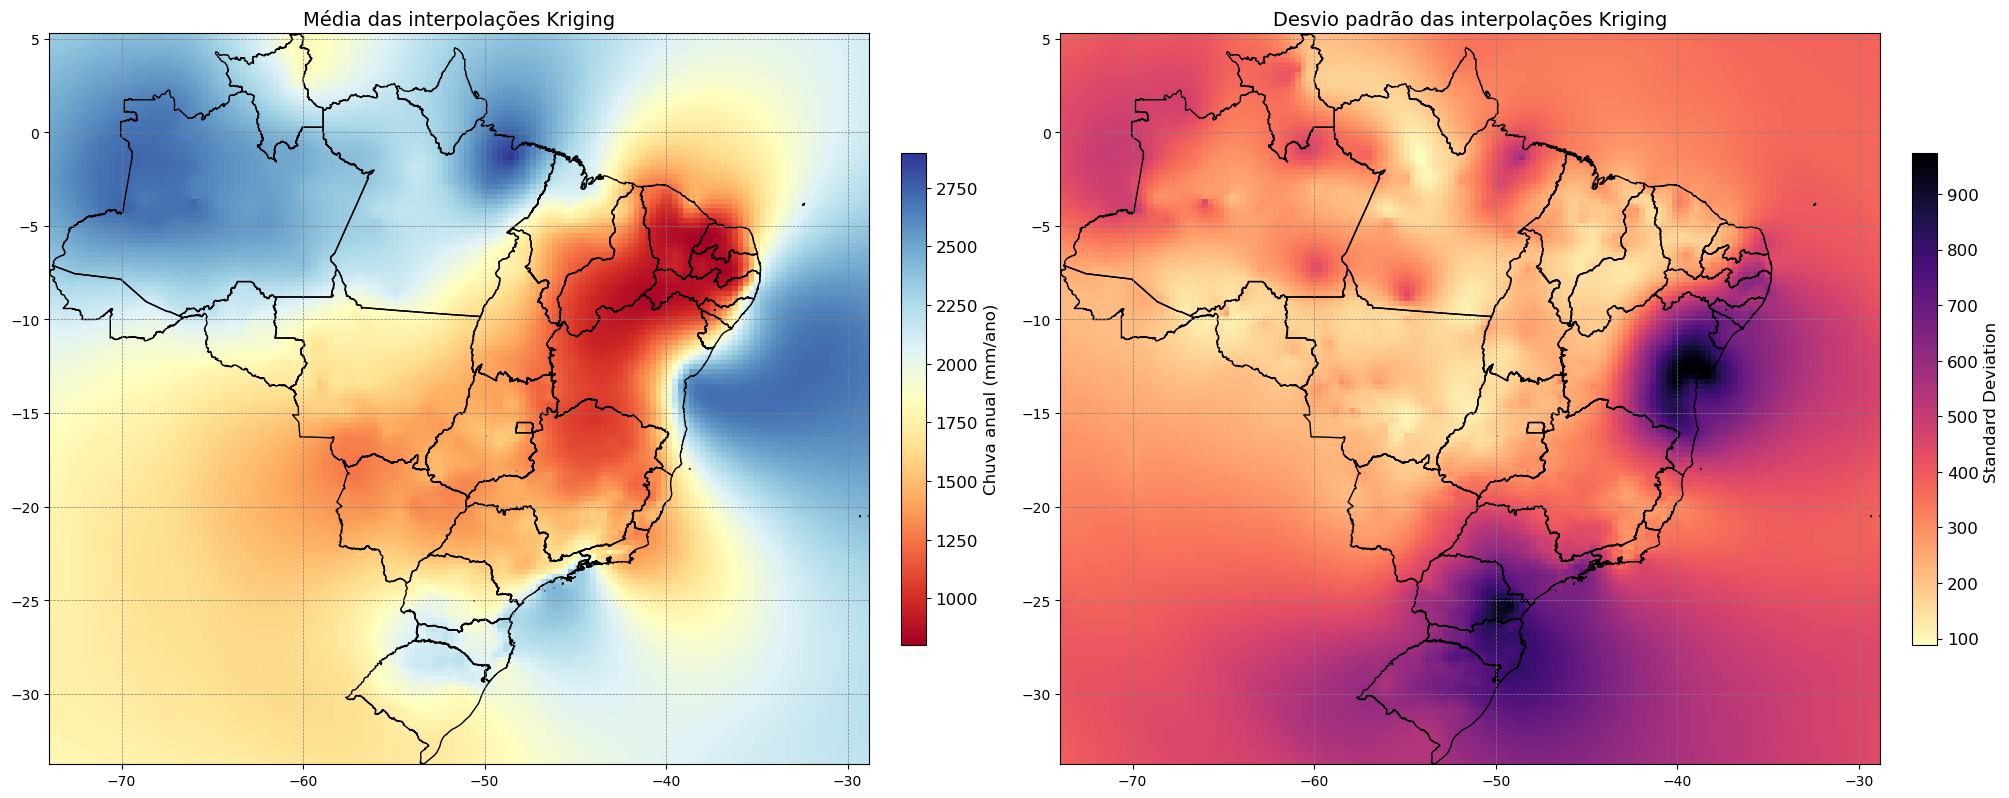

In [90]:
mapas =['EI_30','rain','E_D']
unity=['Erosividade (MJ.mm/ha.h.ano)','Chuva anual (mm/ano)','Densidade de erosividade (MJ/ha.h)']
for mapa in mapas
    output_std_dev_path = os.path.join(general_path, '2 - Result_images', f'{mapa}_std_dev_2014_2024.tif')
    output_mean_path = os.path.join(general_path, '2 - Result_images', f'{mapa}_mean_2014_2024.tif')
    with rasterio.open(output_mean_path) as src_mean, rasterio.open(output_std_dev_path) as src_std:
        image_mean = src_mean.read(1)
        image_std = src_std.read(1)
    
    
    bounds = brasil_shapefile.total_bounds
    minx, miny, maxx, maxy = bounds
    extent = [minx, maxx, miny, maxy]
    
    fig, axes = plt.subplots(1, 2, figsize=(20, 10), constrained_layout=True)
    
    for ax, image, title, cmap, cbar_label in zip(
        axes, 
        [image_mean, image_std], 
        ["a) ", "Desvio padrão das interpolações Kriging"], 
        [cmap, plt.cm.magma.reversed()], 
        [f"{unity}", "Coeficiente de variação "]
    ):
        img_plot = ax.imshow(image, extent=extent, origin='lower', cmap=cmap)
        brasil_shapefile.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)
        ax.grid(color='gray', linestyle='--', linewidth=0.5)
        ax.set_title(title, fontsize=16)
        cbar = plt.colorbar(img_plot, ax=ax, orientation='vertical', fraction=0.03, pad=0.04)
        cbar.ax.tick_params(labelsize=14)
        cbar.set_label(cbar_label, fontsize=14)
    plt.savefig(os.path.join(general_path, '2 - Result_images', 'map_Média_Desvio_rain.png'), dpi=300, bbox_inches='tight')
    plt.show()


In [23]:

# Extract the necessary columns
latitude = df_data['lat'].values
longitude = df_data['long'].values
aqi_value = df_data[str(year)].values
# Define the grid for interpolation
bounds = brasil_shapefile.total_bounds  # [minx, miny, maxx, maxy]
minx, miny, maxx, maxy = bounds
gridx = np.linspace(minx , maxx , 150)
gridy = np.linspace(miny, maxy , 150)

## Ordinary Kriging

Plotting Enabled

Initializing variogram model...
Coordinates type: 'geographic' 

Using 'spherical' Variogram Model
Partial Sill: 71943707.99522984
Full Sill: 114103833.90526006
Range: 7.609283067277492
Nugget: 42160125.91003021 



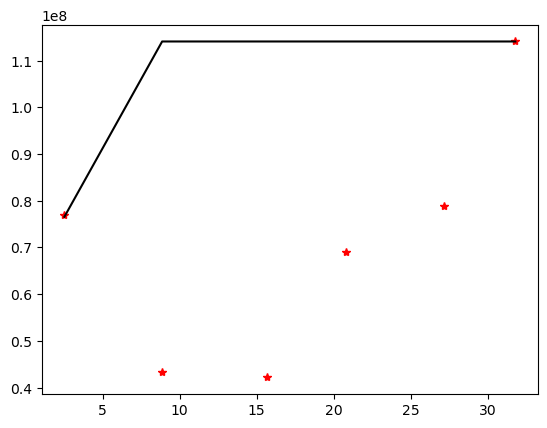

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



In [24]:


# Perform Ordinary Kriging using the spherical variogram model
OK = OrdinaryKriging(longitude, 
                     latitude, 
                     aqi_value, 
                     variogram_model='spherical', 
                     coordinates_type='geographic', 
                     verbose=True, 
                     enable_plotting=True)
z_interp, ss = OK.execute('grid', gridx, gridy)

## Create overlay image of kriging interpolated values

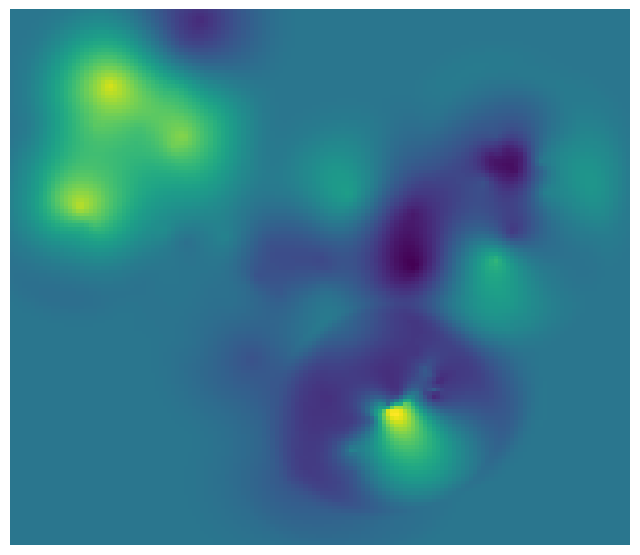

In [25]:
year = 2014
df_data = pd.read_hdf(f"{general_path}/Results_Erosivity_zero.h5", key='EI_30')
df_data=df_data[['long','lat',str(year),'state','gauge_code']].replace(0, np.nan).dropna().reset_index(drop=True)
df_data
latitude = df_data['lat'].values
longitude = df_data['long'].values
aqi_value = df_data[str(year)].values

# Perform Ordinary Kriging using the spherical variogram model
OK = OrdinaryKriging(longitude, 
                     latitude, 
                     aqi_value, 
                     variogram_model='spherical', 
                     coordinates_type='geographic', 
                     verbose=True, 
                     enable_plotting=True)
z_interp, ss = OK.execute('grid', gridx, gridy)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the interpolation results
cax = ax.imshow(z_interp, 
                extent=[gridx.min(), 
                        gridx.max(), 
                        gridy.min(), 
                        gridy.max()], 
                origin='lower', 
                cmap='viridis', 
                alpha=1)
ax.axis('off')

# Save the image
fig.savefig('kriging_interpolation.png', bbox_inches='tight', pad_inches=0, transparent=True)
plt.close(fig)

# Load the image with PIL
image = Image.open('kriging_interpolation.png')
fig          

## Create base map with overlayed interpolated data

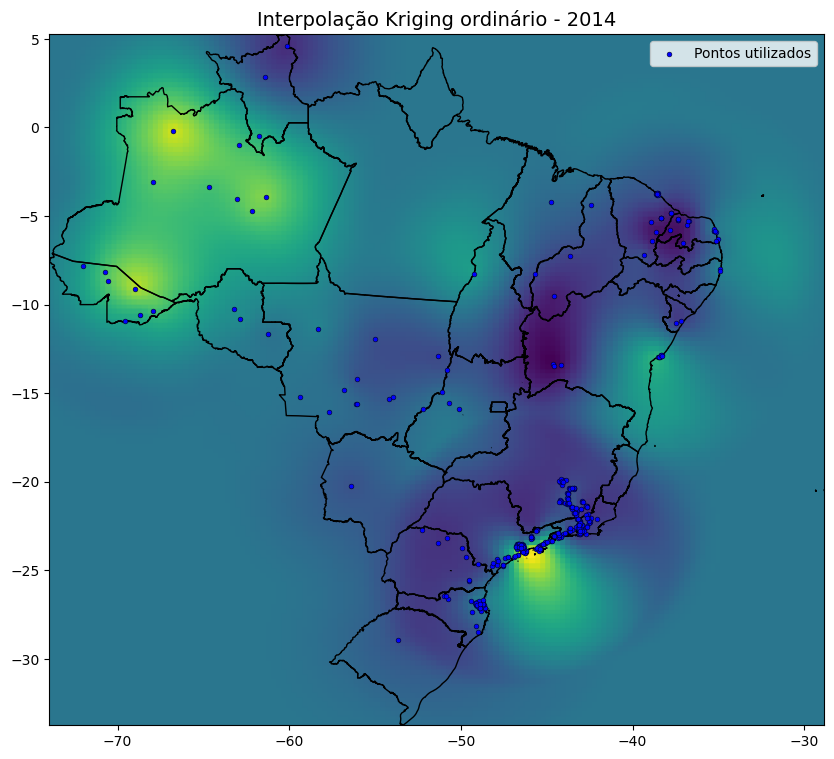

In [29]:



# Abrir a imagem interpolada recortada
image_path = "kriging_interpolation.png"
image = Image.open(image_path)

# Configurar os limites do recorte na escala geográfica
bounds = brasil_shapefile.total_bounds  # [minx, miny, maxx, maxy]
minx, miny, maxx, maxy = bounds
extent = [minx, maxx, miny, maxy]  # Extensão da área de interesse

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(10, 10))

# Exibir a imagem interpolada como plano de fundo
ax.imshow(image, extent=extent, origin='upper', cmap='viridis')

# Plotar o shapefile do Brasil
brasil_shapefile.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)

# Plotar os pontos utilizados
ax.scatter(longitude, latitude, color="blue", label="Pontos utilizados", zorder=3,marker='o',s=12,edgecolor="black",linewidth=0.35 )


# Configurar título e legenda
ax.set_title(f"Interpolação Kriging ordinário - {}", fontsize=14)
ax.legend()

# Salvar a figura
plt.savefig(f"Kriging_map_{year}.png", dpi=300, bbox_inches='tight')

# Mostrar a figura
plt.show()

TypeError: Invalid shape (1, 150, 150) for image data

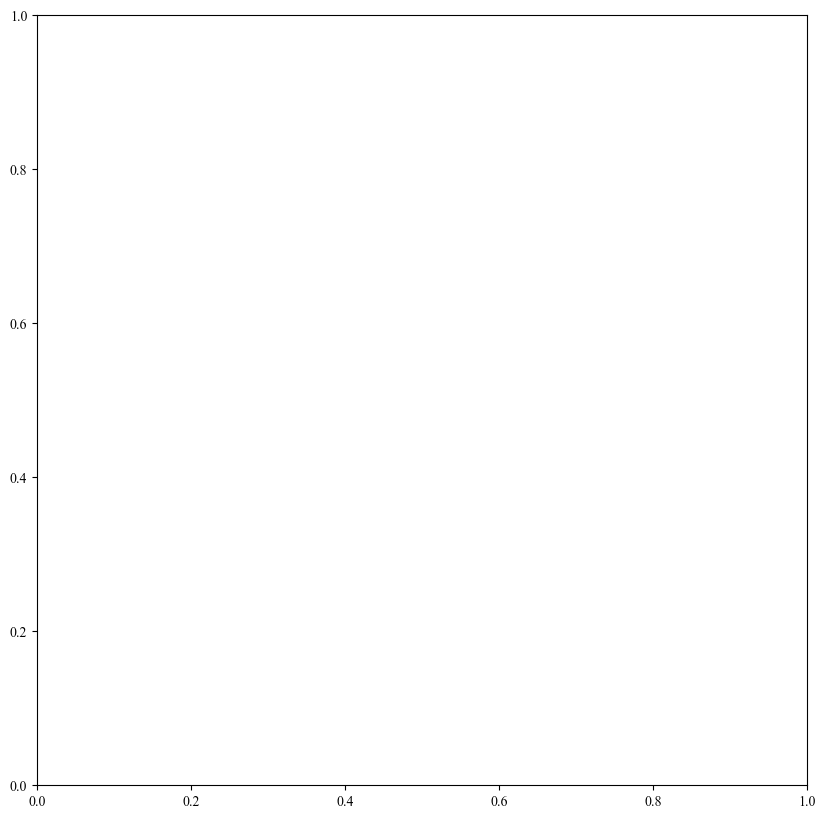

In [66]:
import rasterio
from rasterio.mask import mask
import geopandas as gpd
from PIL import Image
with rasterio.open(output_mean_path) as src_mean:
    z_interp = src_mean.read(1)

# Salvar a interpolação como um GeoTIFF
with rasterio.open(
    output_mean_path,
    "w",
    driver="GTiff",
    height=z_interp.shape[0],
    width=z_interp.shape[1],
    count=1,
    dtype=z_interp.dtype,
    crs="EPSG:4326",  # Certifique-se de usar a projeção correta
    transform=rasterio.transform.from_bounds(minx, miny, maxx, maxy, z_interp.shape[1], z_interp.shape[0]),
) as dst:
    dst.write(z_interp, 1)


# Recortar o GeoTIFF com base no shapefile
with rasterio.open(output_mean_path) as src:
    out_image, out_transform = mask(src, brasil_shapefile.geometry, crop=True)
    out_meta = src.meta

# Atualizar metadados para o novo arquivo recortado
out_meta.update(
    {"driver": "GTiff", "height": out_image.shape[1], "width": out_image.shape[2], "transform": out_transform}
)

# Salvar o GeoTIFF recortado
with rasterio.open("interpolation_cropped.tif", "w", **out_meta) as dest:
    dest.write(out_image)

# Reabrir e plotar a imagem recortada
with rasterio.open("interpolation_cropped.tif") as src:
    image_cropped = src.read(1)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(out_image, extent=extent, origin="upper", cmap="magma")
brasil_shapefile.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)
ax.set_title("Interpolação Kriging Recortada", fontsize=14)
ax.legend()
plt.show()


   Erosividade (R)     Nível de Erosividade  Percentual Observado (%)
0         R ≤ 2452        Erosividade Fraca                      59.7
1  2452 < R ≤ 4905        Erosividade Média                       0.0
2  4905 < R ≤ 7357  Erosividade Média-Forte                       3.4
3  7357 < R ≤ 9810        Erosividade Forte                       8.1
4         9810 < R  Erosividade Muito Forte                      28.8


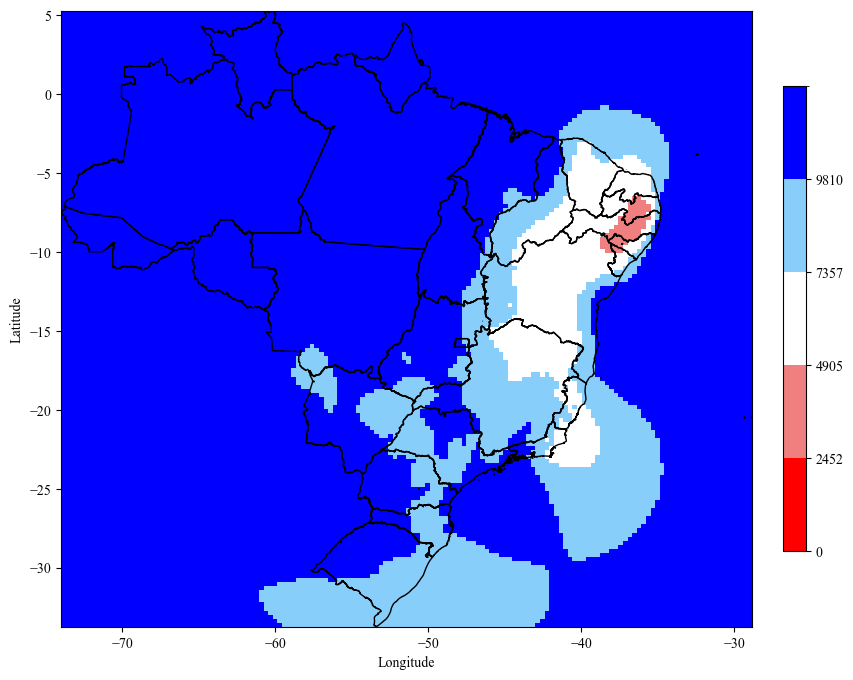

In [82]:
import numpy as np
import pandas as pd
import rasterio
from rasterio.mask import mask
import geopandas as gpd
import matplotlib.pyplot as plt

# Abrir o raster recortado
with rasterio.open("interpolation_cropped.tif") as src:
    image_cropped = src.read(1)
    extent = [src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top]

# Definir os intervalos de erosividade e rótulos
bins = [0, 2452, 4905, 7357, 9810, np.inf]
labels = [
    "Erosividade Fraca",
    "Erosividade Média",
    "Erosividade Média-Forte",
    "Erosividade Forte",
    "Erosividade Muito Forte"
]

# Contar os pixels em cada intervalo
hist, _ = np.histogram(image_cropped, bins=bins)
total_pixels = np.sum(hist)
percentages = (hist / total_pixels) * 100

# Criar DataFrame com os resultados
df = pd.DataFrame({
    "Erosividade (R)": ["R ≤ 2452", "2452 < R ≤ 4905", "4905 < R ≤ 7357", "7357 < R ≤ 9810", "9810 < R"],
    "Nível de Erosividade": labels,
    "Percentual Observado (%)": np.round(percentages, 1)
})

print(df)
bins = [0.1, 2452, 4905, 7357, 9810, 60000]

norm = mcolors.BoundaryNorm(bins, ncolors=5)

cmap = mcolors.ListedColormap(['red', 'lightcoral', 'white', 'lightskyblue', 'blue'])

plt.figure(figsize=(10, 8))


img=plt.imshow(image_mean, cmap=cmap, norm=norm,extent=extent,  origin='lower',alpha=1)
brasil_shapefile.plot(ax=plt.gca(), facecolor="none", edgecolor="black", linewidth=1)
cbar = plt.colorbar(img, ticks=bins[:-1],fraction=0.03, pad=0.04)

plt.xlabel("Longitude")
plt.ylabel("Latitude")

brasil_shapefile.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=1)
ax.set_title("Interpolação Kriging Recortada", fontsize=14)
plt.savefig(os.path.join(general_path, '2 - Result_images', 'map_classificação.png'), dpi=300, bbox_inches='tight')




plt.show()


In [54]:
df

,Erosividade (R),Nível de Erosividade,Percentual Observado (%)
0,R ≤ 2452,Erosividade Fraca,59.7
1,2452 < R ≤ 4905,Erosividade Média,0.0
2,4905 < R ≤ 7357,Erosividade Média-Forte,3.4
3,7357 < R ≤ 9810,Erosividade Forte,8.1
4,9810 < R,Erosividade Muito Forte,28.8



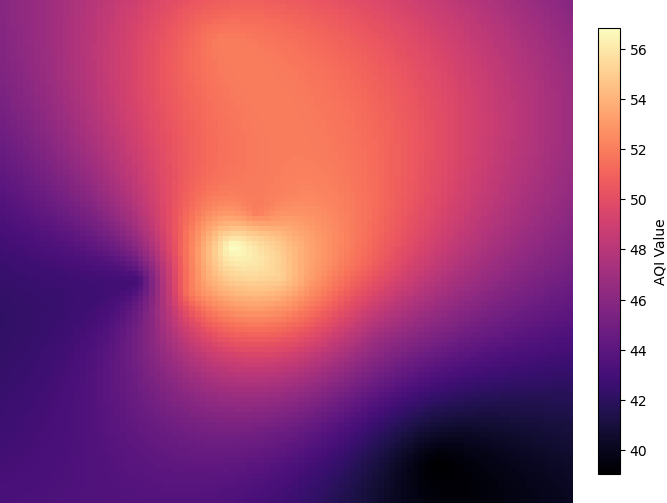

In [15]:
import folium
from folium.raster_layers import ImageOverlay

# Create a base map centered on Houston
m = folium.Map(location=[29.76, -95.37], zoom_start=10)

# Define the bounds where the image will be placed
bounds = [[gridy.min(), gridx.min()], [gridy.max(), gridx.max()]]

# Add the image overlay
image_overlay = ImageOverlay(
    image='kriging_interpolation.png',
    bounds=bounds,
    opacity=.7,
    interactive=True,
    cross_origin=False,
    zindex=1,
)

image_overlay.add_to(m)

# Add points for the measuring stations
for lat, lon in zip(latitude, longitude):
    folium.CircleMarker(
        location=[lat, lon],
        radius=2,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=1
    ).add_to(m)

# Save the map to an HTML file
m.save('houston_kriging_map_with_mesh.html')

# Display the map
m
